In [1]:
%reload_ext autoreload
%autoreload 2

### 1. Import library

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from src.composition.data_composer import DataComposer

### 2. Import UCI dataset, and preprocessing

In [10]:
# column names
column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

# import dataset from adult.data
df = pd.read_csv('dataset/uci_dataset/adult.data', header=None, names=column_names, skipinitialspace=True)
df = df.dropna()

# 0 represents <=50K, 1 represents >50K
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

# 0 represents Female, 1 represents Male
label_encoder_sex = LabelEncoder()
df['sex'] = label_encoder_sex.fit_transform(df['sex'])

# # 0:'Amer-Indian-Eskimo' 1:'Asian-Pac-Islander' 2:'Black' 3:'Other' 4:'White'
# label_encoder_race = LabelEncoder()
# df['race'] = label_encoder_race.fit_transform(df['race'])
# print(f'label_encoder_race.classes:{label_encoder_race.classes_}')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0


In [11]:
# 数值和类别特征列
numeric_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship','race','native-country']

# numeric_features --- Scaler
scaler = StandardScaler()
df_numeric = scaler.fit_transform(df[numeric_features])
df_numeric = pd.DataFrame(df_numeric, columns=numeric_features)  # , index=X_labeled.index  means keep the same index

# categorical_features --- OneHot encoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
df_categorical = encoder.fit_transform(df[categorical_features])
# get feature names after one-hot encoding
encoded_feature_names = encoder.get_feature_names_out(categorical_features)
df_categorical = pd.DataFrame(df_categorical, columns=encoded_feature_names)

# sensitive features 
sex_column = df['sex']
# race_column = df['race']

# target feature
target = df['income']

# df_processed = pd.concat((df_numeric, sex_column, race_column, df_categorical, target), axis=1)

df_processed = pd.concat((df_numeric, sex_column, df_categorical, target), axis=1)
print(f'X_processed shape: {df_processed.shape}')

# 数据分割
X = df_processed.drop('income', axis=1)
y = df_processed['income']
X.head(10)

X_processed shape: (32561, 107)


,age,education-num,capital-gain,capital-loss,hours-per-week,sex,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.030671,1.134739,0.148453,-0.21666,-0.035429,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.837109,1.134739,-0.145920,-0.21666,-2.222153,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.042642,-0.420060,-0.145920,-0.21666,-0.035429,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.057047,-1.197459,-0.145920,-0.21666,-0.035429,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.775768,1.134739,-0.145920,-0.21666,-0.035429,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-0.115955,1.523438,-0.145920,-0.21666,-0.035429,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.763796,-1.974858,-0.145920,-0.21666,-1.979184,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.983734,-0.420060,-0.145920,-0.21666,0.369519,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,-0.555830,1.523438,1.761142,-0.21666,0.774468,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.250608,1.134739,0.555214,-0.21666,-0.035429,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [23]:
# 10% X_label, 90% X_unlabel
X_label, X_unlabel, y_label, y_unlabel = train_test_split(X, y, test_size=0.9, random_state=25) 

In [24]:
# split labeled data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X_label, y_label, test_size=0.3, random_state=25) 

In [25]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (2279, 106)
X_test shape: (977, 106)


### 3. Train the original model

In [26]:
model = XGBClassifier()  # 可以替换为 RandomForestClassifier() 等其他模型
model.fit(X_train,y_train)

# 预测和评估
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8433981576253838


In [27]:
# sensitive feature in X_test
a_test =X_test['sex']
a_test

17295    0
15561    1
20831    0
13414    1
11090    1
        ..
12762    1
11306    1
25560    1
15326    1
1746     1
Name: sex, Length: 977, dtype: int32

### 4. Fairness metrics checking

In [28]:
from fairlearn.metrics import MetricFrame, selection_rate,false_positive_rate,true_positive_rate,false_negative_rate,true_negative_rate,count
metrics = {'accuracy': accuracy_score,
           'selection_rate': selection_rate,
           'false_positive_rate': false_positive_rate,
           'true_positive_rate': true_positive_rate,
           'false_negative_rate': false_negative_rate,
           'true_negative_rate': true_negative_rate,
              'count': count}

Test set fairness metrics (before mitigation):


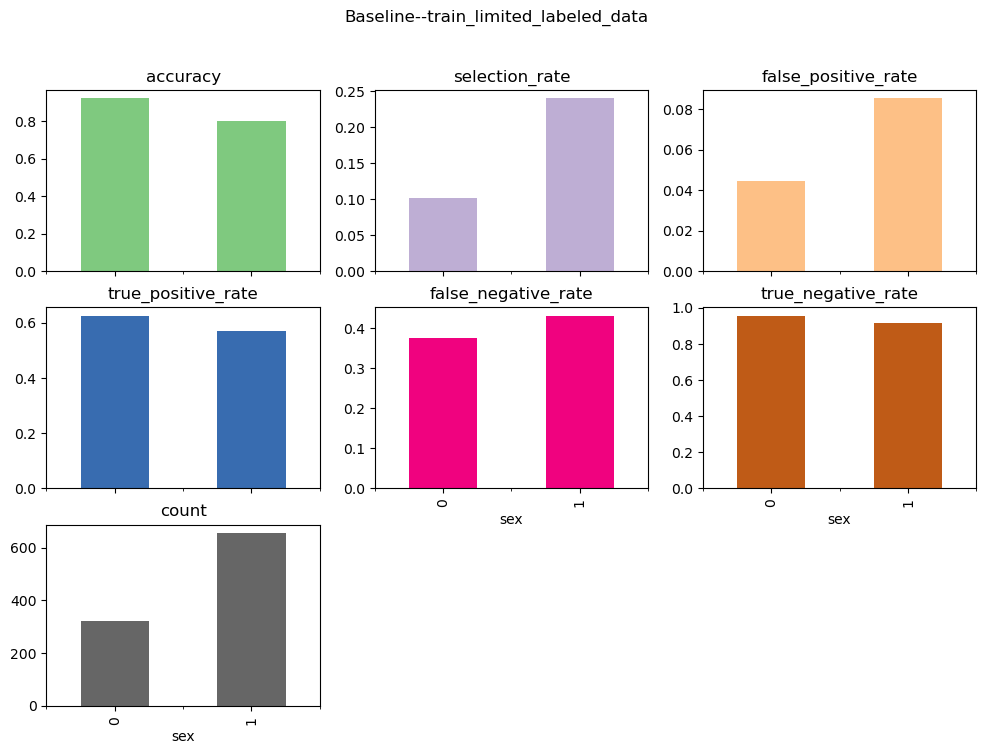

In [29]:
mf_original = MetricFrame(metrics=metrics,
                 y_true=y_test,
                 y_pred=y_pred,
                 sensitive_features=a_test)

print("Test set fairness metrics (before mitigation):")
mf_original.by_group.plot(
    kind="bar",
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    colormap="Accent",
    title="Baseline--train_limited_labeled_data",
)
diff = mf_original.by_group


In [30]:
import matplotlib.pyplot as plt
def plot_diff_accuracy(diff):
    # 提取 'accuracy' 列的两行值
    group0_value = diff.loc[0, 'accuracy']
    group1_value = diff.loc[1, 'accuracy']
    
    # 创建柱状图
    plt.figure(figsize=(6, 6))
    plt.bar(['Group 0', 'Group 1'], [group0_value, group1_value], color=['blue', 'orange'])
    plt.xlabel('Group')
    plt.ylabel('Accuracy')
    plt.title('Accuracy for Group 0 and Group 1')

    # 在每个条形顶部显示数值，保留三位小数
    for i, value in enumerate([group0_value, group1_value]):
        plt.text(i, value, f'{value:.3f}', ha='center', va='bottom')
    plt.show()

def plot_diff(diff):
    # 计算第一行和第二行的差值的绝对值
    diff = diff.drop(columns=['count'])
    diff_values = abs(diff.iloc[0] - diff.iloc[1])

    # 创建柱状图
    plt.figure(figsize=(10, 6))
    bars = plt.bar(diff.columns, diff_values)
    plt.xlabel('Column Names')
    plt.ylabel('Absolute Difference')
    plt.title('Absolute Difference Between First and Second Rows')
    plt.xticks(rotation=45)

    # 在每个条形顶部显示数值
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,
                 f'{height:.3f}', ha='center', va='bottom')

    plt.show()


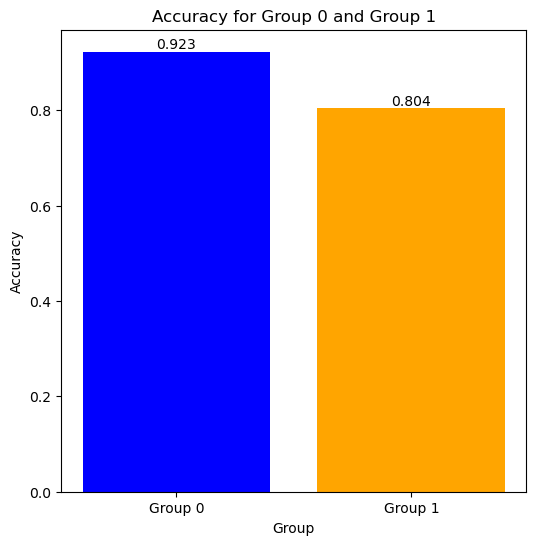

In [31]:
plot_diff_accuracy(diff)

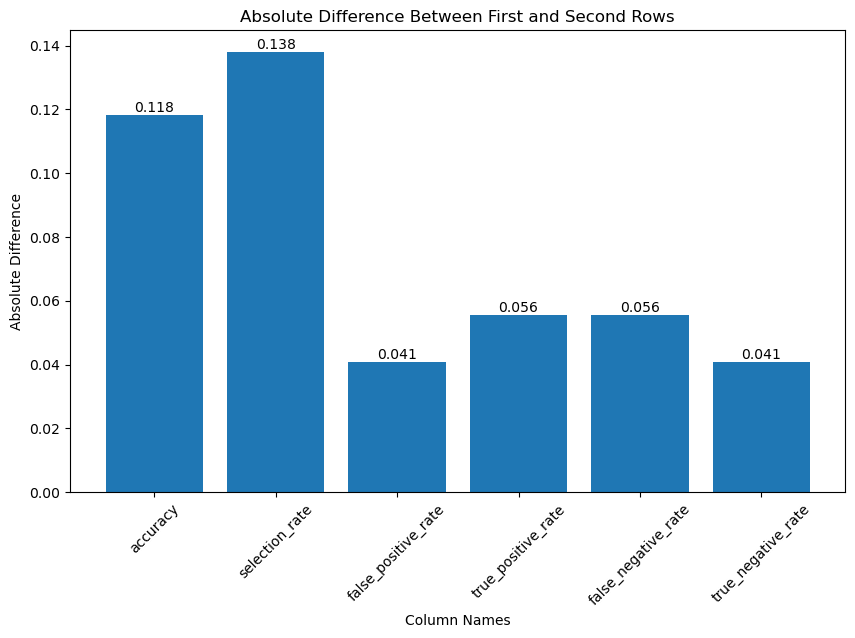

In [32]:
plot_diff(diff)

## -----------------------WE WILL ADD FAIRNESS BELOW-------------------------------------------------------

###  (Debug part) FAIR-SHAP Fairness Attribution Module 

In [43]:
'''
Use matcher to find the matching data pairs
'''

from src.matching import NearestNeighborDataMatcher
from src.matching import OptimalTransportPolicy
matching_nn = NearestNeighborDataMatcher(
    X_labeled=X_train,
    X_unlabeled=X_unlabel,
).match(n_neighbors=1)
print(f'matching shape: {matching_nn.shape}')

# matching_ot = OptimalTransportPolicy(
#     X_labeled=X_train.values,
#     X_unlabeled=X_unlabel.values,
# ).match()
# print(f'matching shape: {matching_ot.shape}')  #numItermax = 1000000

matching shape: (2279, 29305)


In [44]:
'''
Set the sensitive variables, and initilize the fairness_explainer
'''
from src.attribution import FairnessExplainer
sen_att_name = ["sex"]
sen_att = [X_train.columns.get_loc(name) for name in sen_att_name]
priv_val = [1]
unpriv_dict = [list(set(X_train.values[:, sa])) for sa in sen_att]
for sa_list, pv in zip(unpriv_dict, priv_val):
    sa_list.remove(pv)
print(f'sen_att_name:{sen_att_name}')
print(f'sen_att:{sen_att}') # index of sensitive attribute
print(f'priv_val:{priv_val}') # privileged value
print(f'unpriv_dict:{unpriv_dict}') # unprivileged value(all values in the sensitive attribute, except the privileged value)

fairness_explainer = FairnessExplainer(
    model=model, 
    sen_att=sen_att, 
    priv_val=priv_val, 
    unpriv_dict=unpriv_dict
    )

sen_att_name:['sex']
sen_att:[5]
priv_val:[1]
unpriv_dict:[[0.0]]


c:\Users\ZhuLi\anaconda3\envs\unlabel_fair\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [45]:
'''
generate shapley values
'''
fairness_shap_values = fairness_explainer.shap_values(
    X=X_train.values,
    X_baseline=X_unlabel.values,
    matching=matching_nn,
    # matching=matching_ot,
    sample_size=6000,
    shap_sample_size="auto",
)

'''
对shapley value取绝对值
'''
# EPSILON = 1e-20
# def convert_matrix_to_policy(matrix):
#     P = np.abs(matrix) / np.abs(matrix).sum()
#     P += EPSILON
#     P /= P.sum()
#     return P
# varphi = convert_matrix_to_policy(fairness_shap_values)

'''
对shapley value不取绝对值
'''
varphi = fairness_shap_values

In [46]:
# Count the number of non-zero values
non_zero_count = np.count_nonzero(varphi)
print(f"Number of non-zero values: {non_zero_count}")

Number of non-zero values: 3667


In [47]:
print(f'X_train.shape: {X_train.shape}')
print(f'fairness_shap_values shape: {fairness_shap_values.shape}')  

pd.set_option('display.max_columns', None)
pd.DataFrame(fairness_shap_values, columns=X_train.columns).head()

X_train.shape: (2279, 106)
fairness_shap_values shape: (2279, 106)


,age,education-num,capital-gain,capital-loss,hours-per-week,sex,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,native-country_?,native-country_Cambodia,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.039727,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.001190,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.005154,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.109934,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.

### 5. ※ Create new training dataset

#### 5.1 random pick n% instances from unlabel data

In [54]:
'''
random pick之后, 有放回
'''
def random_pick_groups(X_unlabel, proportion=0.3, group_num=3):
    # calculate the sample size
    sample_size = int(len(X_unlabel) * proportion)

    # random pick
    random_picks = []
    for i in range(group_num):
        random_pick = X_unlabel.sample(n=sample_size)  # random_state
        random_picks.append(random_pick)
    

    return tuple(random_picks)
    
# how to use
# if group_num = 2:
# random_pick1, random_pick2, random_pick3 = random_pick_groups(X_unlabel, proportion=0.6, group_num=3)
random_pick = random_pick_groups(X_unlabel, proportion=0.6, group_num=3)

#### 5.2 针对每个random_pick group, 让x_label在这个group中使用nn找到最接近的instances，然后重新计算shapley values, 重新计算q, 直到重新做完整个流程

In [65]:
def get_matching(random_pick):
    matchings = []
    for i in range(3):

        matching = NearestNeighborDataMatcher(X_labeled=X_train, X_unlabeled=random_pick[i]).match(n_neighbors=1)
        matchings.append(matching)
        print
    return tuple(matchings)
matching = get_matching(random_pick=random_pick)

In [45]:
'''
1. 分别计算两个random pick group的matching matrix
'''

from src.matching.ot_matcher import OptimalTransportPolicy
from src.matching.nn_matcher import NearestNeighborDataMatcher
# for the first random pick group
matching_nn_1 = NearestNeighborDataMatcher(
    X_labeled=X_train,
    X_unlabeled=random_pick1,
).match(n_neighbors=1)
print(f'matching_nn_1 shape: {matching_nn_1.shape}')
# matching_ot_1 = OptimalTransportPolicy(
#     X_labeled=X_train.values,
#     X_unlabeled=random_pick1.values,
# ).match()

# for the second random pick group
matching_nn_2 = NearestNeighborDataMatcher(
    X_labeled=X_train,
    X_unlabeled=random_pick2,
).match(n_neighbors=1)
print(f'matching_nn_2 shape: {matching_nn_2.shape}')
# matching_ot_2 = OptimalTransportPolicy(
#     X_labeled=X_train.values,
#     X_unlabeled=random_pick2.values,
# ).match()

# for the third random pick group
matching_nn_3 = NearestNeighborDataMatcher(
    X_labeled=X_train,
    X_unlabeled=random_pick3,
).match(n_neighbors=1)
print(f'matching_nn_3 shape: {matching_nn_3.shape}')
# matching_ot_3 = OptimalTransportPolicy(
#     X_labeled=X_train.values,
#     X_unlabeled=random_pick3.values,
# ).match()


matching_nn_1 shape: (2279, 17583)
matching_nn_2 shape: (2279, 17583)
matching_nn_3 shape: (2279, 17583)


In [90]:
'''
Set the sensitive variables, and initilize the fairness_explainer
'''
from src.attribution import FairnessExplainer
sen_att_name = ["sex"]
sen_att = [X_train.columns.get_loc(name) for name in sen_att_name]
priv_val = [1]
unpriv_dict = [list(set(X_train.values[:, sa])) for sa in sen_att]
for sa_list, pv in zip(unpriv_dict, priv_val):
    sa_list.remove(pv)
print(f'sen_att_name:{sen_att_name}')
print(f'sen_att:{sen_att}') # index of sensitive attribute
print(f'priv_val:{priv_val}') # privileged value
print(f'unpriv_dict:{unpriv_dict}') # unprivileged value(all values in the sensitive attribute, except the privileged value)

fairness_explainer = FairnessExplainer(
    model=model, 
    sen_att=sen_att, 
    priv_val=priv_val, 
    unpriv_dict=unpriv_dict
    )


'''
2. 分别计算两个random pick group的fairness shapley value
'''
# for the first random pick group
fairness_shap_values_1 = fairness_explainer.shap_values(
    X=X_train.values,
    X_baseline=random_pick1.values,
    matching=matching_nn_1,
    # matching=matching_ot_1,
    sample_size=500,
    shap_sample_size="auto",
)
print(1)
# for the second random pick group
fairness_shap_values_2 = fairness_explainer.shap_values(
    X=X_train.values,
    X_baseline=random_pick2.values,
    matching=matching_nn_2,
    # matching=matching_ot_2,
    sample_size=500,
    shap_sample_size="auto",
)

sen_att_name:['sex']
sen_att:[5]
priv_val:[1]
unpriv_dict:[[0.0]]
1


In [91]:
# for the third random pick group
fairness_shap_values_3 = fairness_explainer.shap_values(
    X=X_train.values,
    X_baseline=random_pick3.values,
    matching=matching_nn_3,
    # matching=matching_ot_3,
    sample_size=500,
    shap_sample_size="auto",
)

In [92]:
'''
对shapley value取绝对值
'''
# EPSILON = 1e-20
# def convert_matrix_to_policy(matrix):
#     P = np.abs(matrix) / np.abs(matrix).sum()
#     P += EPSILON
#     P /= P.sum()
#     return P
# varphi = convert_matrix_to_policy(fairness_shap_values)

'''
对shapley value不取绝对值
'''
varphi_1 = fairness_shap_values_1
varphi_2 = fairness_shap_values_2
varphi_3 = fairness_shap_values_3

In [93]:
''' 
把varphi中的负值直接设为0, 然后归一化
'''
def fix_negative_probabilities(varphi):
    """
    Fix the probability distribution by:
    1. Setting negative values to 0.
    2. Normalizing the probabilities to sum to 1.
    """
    # Step 1: Set negative values to 0
    varphi = np.maximum(varphi, 0)
    
    # Step 2: Normalize to make the sum equal to 1
    total_prob = varphi.sum()
    if total_prob == 0:
        raise ValueError("All probabilities are zero after fixing negative values.")
    
    varphi = varphi / total_prob
    return varphi

varphi_1 = fix_negative_probabilities(varphi_1)
varphi_2 = fix_negative_probabilities(varphi_2)
varphi_3 = fix_negative_probabilities(varphi_3)
non_zero_count_1 = np.count_nonzero(varphi_1)
non_zero_count_2 = np.count_nonzero(varphi_2)
non_zero_count_3 = np.count_nonzero(varphi_3)
print(f"Number of non-zero values: {non_zero_count_1}")
print(f"Number of non-zero values: {non_zero_count_2}")
print(f"Number of non-zero values: {non_zero_count_3}")

Number of non-zero values: 1991
Number of non-zero values: 2065
Number of non-zero values: 2041


In [94]:
'''
3. 分别重新计算两个random pick group的 q
'''
from src.composition.data_composer import DataComposer
# for the first random pick group
q1 = DataComposer(x_counterfactual=random_pick1.values, joint_prob=matching_nn_1, method="max").calculate_q() # Use joint_prob to find the matching unlabeled data to each labeled data instance
print(f'q1 shape: {q1.shape}')
# for the second random pick group
q2 = DataComposer(x_counterfactual=random_pick2.values, joint_prob=matching_nn_2, method="max").calculate_q() # Use joint_prob to find the matching unlabeled data to each labeled data instance

# for the third random pick group
q3 = DataComposer(x_counterfactual=random_pick3.values, joint_prob=matching_nn_3, method="max").calculate_q() # Use joint_prob to find the matching unlabeled data to each labeled data instance

q1 shape: (2279, 106)


In [95]:
print(q1)

[[ 0.39723348 -0.03136003 -0.14592048 ...  1.          0.
   0.        ]
 [ 1.6435474  -2.36355761 -0.14592048 ...  1.          0.
   0.        ]
 [-1.43558112 -0.03136003 -0.14592048 ...  1.          0.
   0.        ]
 ...
 [-0.26257978 -0.03136003 -0.14592048 ...  1.          0.
   0.        ]
 [ 0.83710898 -0.42005962 -0.14592048 ...  1.          0.
   0.        ]
 [ 0.54385864 -0.03136003 -0.14592048 ...  1.          0.
   0.        ]]


In [96]:
q2

array([[ 0.32392089, -0.03136003, -0.14592048, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.61717123, -2.36355761, -0.14592048, ...,  1.        ,
         0.        ,  0.        ],
       [-1.43558112, -0.03136003, -0.14592048, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.26257978, -0.03136003, -0.14592048, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.54385864, -0.42005962, -0.14592048, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.7637964 , -0.03136003, -0.14592048, ...,  1.        ,
         0.        ,  0.        ]])

In [97]:
q3

array([[ 0.32392089, -0.03136003, -0.14592048, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.61717123, -2.36355761, -0.14592048, ...,  1.        ,
         0.        ,  0.        ],
       [-1.43558112, -0.03136003, -0.14592048, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.26257978, -0.03136003, -0.14592048, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.83710898, -0.42005962, -0.14592048, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.7637964 , -0.03136003, -0.14592048, ...,  1.        ,
         0.        ,  0.        ]])

In [98]:
varphi_1

array([[0.00148659, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00031124, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [99]:
X_train

,age,education-num,capital-gain,capital-loss,hours-per-week,sex,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,native-country_?,native-country_Cambodia,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
27379,0.103983,-0.031360,-0.14592,-0.21666,0.369519,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2383,1.790173,-2.363558,-0.14592,-0.21666,-0.035429,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30987,-1.508894,-0.031360,-0.14592,-0.21666,-0.278399,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25104,0.323921,-0.420060,-0.14592,-0.21666,2.394264,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,

In [100]:
from src.attribution.oracle_metric import perturb_numpy_ver
''' 
计算DR value的函数
'''

def fairness_value_function(sen_att, priv_val, unpriv_dict, X, model):
    X_disturbed = perturb_numpy_ver(
        X=X,
        sen_att=sen_att,
        priv_val=priv_val,
        unpriv_dict=unpriv_dict,
        ratio=1.0,
    )
    fx = model.predict_proba(X)[:, 1]
    fx_q = model.predict_proba(X_disturbed)[:, 1]
    return np.mean(np.abs(fx - fx_q))

In [101]:
def balance_sex_distribution(df, sex_column='sex'):
    """
    平衡数据集中性别分布，使得男性和女性样本数量相等
    
    Parameters:
    -----------
    df : pd.DataFrame
        需要平衡的数据集
    sex_column : str
        性别列的名称
        
    Returns:
    --------
    pd.DataFrame
        平衡后的数据集
    """
    # 分别获取性别为0和1的数据
    sex_0 = df[df[sex_column] == 0]
    sex_1 = df[df[sex_column] == 1]
    
    # 获取较小的样本数
    min_count = min(len(sex_0), len(sex_1))
    
    # 如果某一类样本数量更多，随机抽样减少到较小的数量
    if len(sex_0) > min_count:
        sex_0 = sex_0.sample(n=min_count, random_state=42)
    if len(sex_1) > min_count:
        sex_1 = sex_1.sample(n=min_count, random_state=42)
    
    # 合并平衡后的数据
    balanced_df = pd.concat([sex_0, sex_1])
    
    # 随机打乱数据顺序
    balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)
    
    return balanced_df

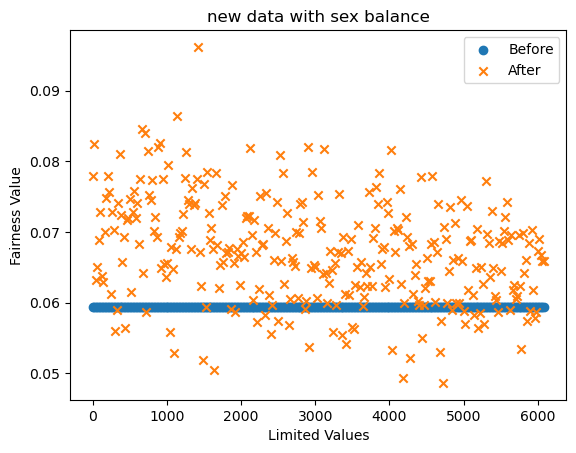

In [102]:
''' 
4. 分别计算3个random pick group
'''

# Initialize arrays to store before and after values
limited_values_range = np.arange(1, non_zero_count_1 + non_zero_count_2 + non_zero_count_3, 20)
before_values = []
after_values = []

for limited_values in limited_values_range:
   # 计算每个group应该取多少个值
   # 按比例分配给三个groups，并确保不超过各自的上限
   total_count = non_zero_count_1 + non_zero_count_2 + non_zero_count_3
   ratio_1 = non_zero_count_1 / total_count
   ratio_2 = non_zero_count_2 / total_count
   
   limited_values_1 = min(int(limited_values * ratio_1), non_zero_count_1)
   limited_values_2 = min(int(limited_values * ratio_2), non_zero_count_2)
   limited_values_3 = min(limited_values - limited_values_1 - limited_values_2, non_zero_count_3)
   
   # Group 1的处理
   action_indice_1 = np.random.choice(
       a=varphi_1.size,
       size=limited_values_1,
       p=varphi_1.flatten(),
       replace=False,
   )
   action_indice_1 = np.unique(action_indice_1)
   row_indices_1, col_indices_1 = np.unravel_index(action_indice_1, varphi_1.shape)
   q_values1 = q1[row_indices_1, col_indices_1]
   
   # Group 2的处理
   action_indice_2 = np.random.choice(
       a=varphi_2.size,
       size=limited_values_2,
       p=varphi_2.flatten(),
       replace=False,
   )
   action_indice_2 = np.unique(action_indice_2)
   row_indices_2, col_indices_2 = np.unravel_index(action_indice_2, varphi_2.shape)
   q_values2 = q2[row_indices_2, col_indices_2]
   
   # Group 3的处理
   action_indice_3 = np.random.choice(
       a=varphi_3.size,
       size=limited_values_3,
       p=varphi_3.flatten(),
       replace=False,
   )
   action_indice_3 = np.unique(action_indice_3)
   row_indices_3, col_indices_3 = np.unravel_index(action_indice_3, varphi_3.shape)
   q_values3 = q3[row_indices_3, col_indices_3]
   
   # 生成新数据
   X_observe_with_target = np.column_stack((X_train, y_train))
   
   # 处理Group 1的新数据
   x_new1 = X_observe_with_target.copy()
   for row_idx, col_idx, q_val in zip(row_indices_1, col_indices_1, q_values1):
       x_new1[row_idx, col_idx] = q_val
       
   # 处理Group 2的新数据
   x_new2 = X_observe_with_target.copy()
   for row_idx, col_idx, q_val in zip(row_indices_2, col_indices_2, q_values2):
       x_new2[row_idx, col_idx] = q_val
       
   # 处理Group 3的新数据
   x_new3 = X_observe_with_target.copy()
   for row_idx, col_idx, q_val in zip(row_indices_3, col_indices_3, q_values3):
       x_new3[row_idx, col_idx] = q_val
   
   # 合并所有数据
   X_TRAIN_NEW = np.vstack((X_observe_with_target, x_new1, x_new2, x_new3))
   x_train_new = pd.DataFrame(X_TRAIN_NEW, columns=df_processed.columns)
   sex_bal = 0
   x_train_new = balance_sex_distribution(x_train_new)   ##########################################新增
   sex_bal = 1

   # 训练新模型
   target_name = 'income'
   x = x_train_new.drop(target_name, axis=1)
   y = x_train_new[target_name]
   
   model_new = XGBClassifier()
   model_new.fit(x, y)
   
   # 计算fairness values
   before = fairness_value_function(sen_att, priv_val, unpriv_dict, X_test.values, model)
   after = fairness_value_function(sen_att, priv_val, unpriv_dict, X_test.values, model_new)
   
   before_values.append(before)
   after_values.append(after)

# 绘制结果
# plt.plot(limited_values_range, before_values, label='Before', marker='o')
# plt.plot(limited_values_range, after_values, label='After', marker='x')
# plt.xlabel('Limited Values')
# plt.ylabel('Fairness Value')
# plt.title('Fairness Value vs. Limited Values')
# plt.legend()
# plt.show()
# Scatter plot
plt.scatter(limited_values_range, before_values, label='Before', marker='o')
plt.scatter(limited_values_range, after_values, label='After', marker='x')
plt.xlabel('Limited Values')
plt.ylabel('Fairness Value')
if sex_bal == 1:
    plt.title('new data with sex balance')
else:
    plt.title('Fairness Value vs. Limited Values')

plt.legend()
plt.show()

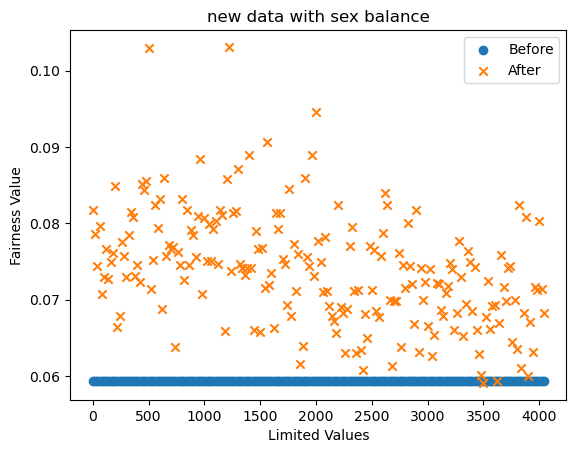

In [103]:
''' 
4. 分别计算两个random pick group的修改后的新增unlabel data
'''

# Initialize arrays to store before and after values
limited_values_range = np.arange(1, non_zero_count_1 + non_zero_count_2, 20)
before_values = []
after_values = []

for limited_values in limited_values_range:
    # 计算每个group应该取多少个值
    # 按比例分配给两个groups，并确保不超过各自的上限
    ratio_1 = non_zero_count_1 / (non_zero_count_1 + non_zero_count_2)
    limited_values_1 = min(int(limited_values * ratio_1), non_zero_count_1)
    limited_values_2 = min(limited_values - limited_values_1, non_zero_count_2)
    
    # Group 1的处理
    action_indice_1 = np.random.choice(
        a=varphi_1.size,
        size=limited_values_1,
        p=varphi_1.flatten(),
        replace=False,
    )
    action_indice_1 = np.unique(action_indice_1)
    row_indices_1, col_indices_1 = np.unravel_index(action_indice_1, varphi_1.shape)
    q_values1 = q1[row_indices_1, col_indices_1]
    
    # Group 2的处理
    action_indice_2 = np.random.choice(
        a=varphi_2.size,
        size=limited_values_2,
        p=varphi_2.flatten(),
        replace=False,
    )
    action_indice_2 = np.unique(action_indice_2)
    row_indices_2, col_indices_2 = np.unravel_index(action_indice_2, varphi_2.shape)
    q_values2 = q2[row_indices_2, col_indices_2]
    
    # 生成新数据
    X_observe_with_target = np.column_stack((X_train, y_train))
    
    # 处理Group 1的新数据
    x_new1 = X_observe_with_target.copy()
    for row_idx, col_idx, q_val in zip(row_indices_1, col_indices_1, q_values1):
        x_new1[row_idx, col_idx] = q_val
        
    # 处理Group 2的新数据
    x_new2 = X_observe_with_target.copy()
    for row_idx, col_idx, q_val in zip(row_indices_2, col_indices_2, q_values2):
        x_new2[row_idx, col_idx] = q_val
    
    # 合并所有数据
    X_TRAIN_NEW = np.vstack((X_observe_with_target, x_new1, x_new2))
    x_train_new = pd.DataFrame(X_TRAIN_NEW, columns=df_processed.columns)
    sex_bal = 0
    x_train_new = balance_sex_distribution(x_train_new)   ##########################################新增
    sex_bal = 1
    # 训练新模型
    target_name = 'income'
    x = x_train_new.drop(target_name, axis=1)
    y = x_train_new[target_name]
    
    model_new = XGBClassifier()
    model_new.fit(x, y)
    
    # 计算fairness values
    before = fairness_value_function(sen_att, priv_val, unpriv_dict, X_test.values, model)
    after = fairness_value_function(sen_att, priv_val, unpriv_dict, X_test.values, model_new)
    
    before_values.append(before)
    after_values.append(after)

# Scatter plot
plt.scatter(limited_values_range, before_values, label='Before', marker='o')
plt.scatter(limited_values_range, after_values, label='After', marker='x')
plt.xlabel('Limited Values')
plt.ylabel('Fairness Value')
if sex_bal == 1:
    plt.title('new data with sex balance')
else:
    plt.title('Fairness Value vs. Limited Values')
plt.legend()
plt.show()

# plt.plot(limited_values_range, before_values, label='Before', marker='o')
# plt.plot(limited_values_range, after_values, label='After', marker='x')
# plt.xlabel('Limited Values')
# plt.ylabel('Fairness Value')
# plt.title('Fairness Value vs. Limited Values')
# plt.legend()
# plt.show()

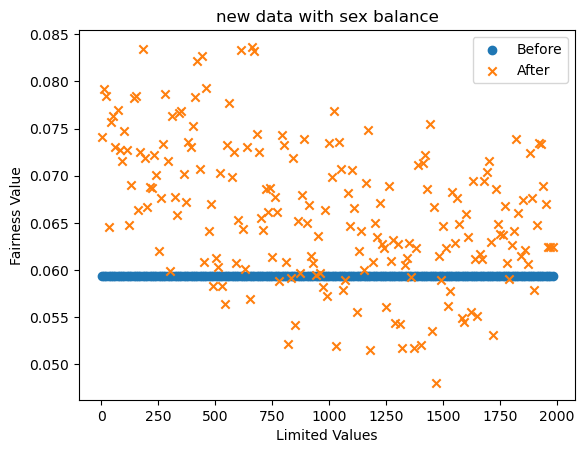

In [104]:
'''
只有一个random group的时候
'''

# Initialize arrays to store before and after values
limited_values_range = np.arange(1, non_zero_count_1, 10)
before_values = []
after_values = []

for limited_values in limited_values_range:
   # Group 1的处理
   action_indice = np.random.choice(
       a=varphi_1.size,
       size=limited_values,
       p=varphi_1.flatten(),
       replace=False,
   )
   action_indice = np.unique(action_indice)
   row_indices, col_indices = np.unravel_index(action_indice, varphi_1.shape)
   q_values = q1[row_indices, col_indices]
   
   # 生成新数据
   X_observe_with_target = np.column_stack((X_train, y_train))
   
   # 处理新数据
   x_new = X_observe_with_target.copy()
   for row_idx, col_idx, q_val in zip(row_indices, col_indices, q_values):
       x_new[row_idx, col_idx] = q_val
   
   # 合并所有数据
   X_TRAIN_NEW = np.vstack((X_observe_with_target, x_new))
   x_train_new = pd.DataFrame(X_TRAIN_NEW, columns=df_processed.columns)
   sex_bal = 0
   x_train_new = balance_sex_distribution(x_train_new)   ##########################################新增
   sex_bal = 1
   # 训练新模型
   target_name = 'income'
   x = x_train_new.drop(target_name, axis=1)
   y = x_train_new[target_name]
   
   model_new = XGBClassifier()
   model_new.fit(x, y)
   
   # 计算fairness values
   before = fairness_value_function(sen_att, priv_val, unpriv_dict, X_test.values, model)
   after = fairness_value_function(sen_att, priv_val, unpriv_dict, X_test.values, model_new)
   
   before_values.append(before)
   after_values.append(after)

# Scatter plot
plt.scatter(limited_values_range, before_values, label='Before', marker='o')
plt.scatter(limited_values_range, after_values, label='After', marker='x')
plt.xlabel('Limited Values')
plt.ylabel('Fairness Value')
if sex_bal == 1:
    plt.title('new data with sex balance')
else:
    plt.title('Fairness Value vs. Limited Values')
plt.legend()
plt.show()
# 绘制结果
# plt.plot(limited_values_range, before_values, label='Before', marker='o')
# plt.plot(limited_values_range, after_values, label='After', marker='x')
# plt.xlabel('Limited Values')
# plt.ylabel('Fairness Value')
# plt.title('Fairness Value vs. Limited Values')
# plt.legend()
# plt.show()

### ------------------------------------------往下暂时用不着-----------------------------------------------------------------

### 7. Train the new model 

In [ ]:
model_new = XGBClassifier()  # 可以替换为 RandomForestClassifier() 等其他模型
model_new.fit(x, y)

# 预测和评估
y_pred_new = model_new.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_new)
print(f'Accuracy: {accuracy}')
mf_original = MetricFrame(metrics=metrics,
                 y_true=y_test,
                 y_pred=y_pred_new,
                 sensitive_features=a_test)
diff_new = mf_original.by_group
plot_diff_accuracy(diff_new)

Accuracy: 0.8393039918116684


Test set fairness metrics (after mitigation):


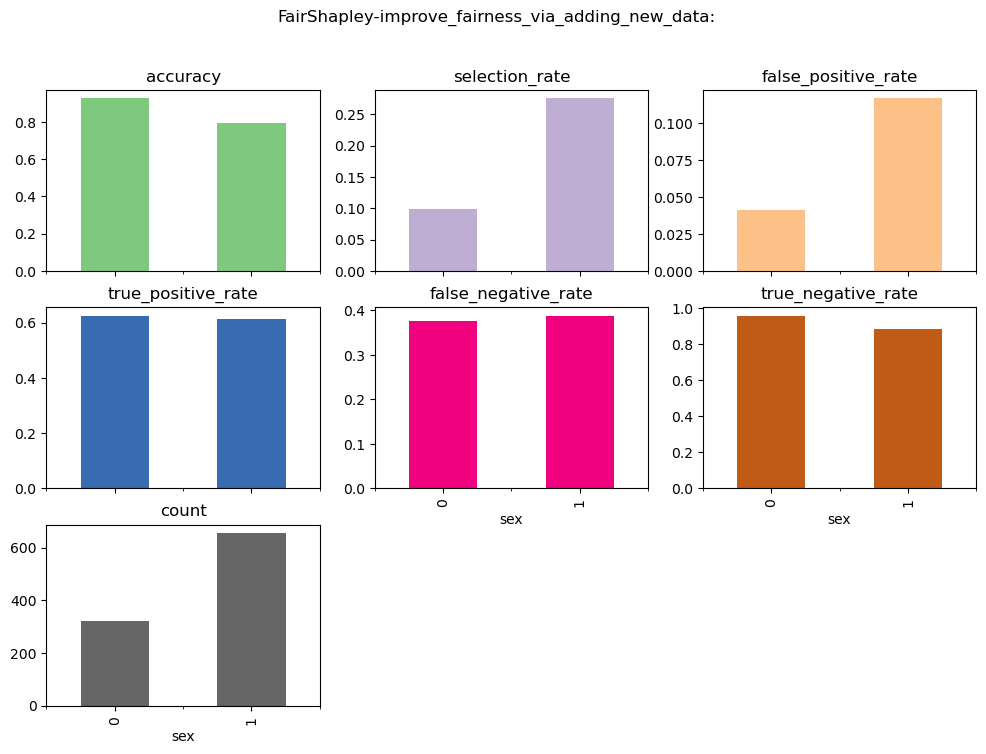

In [390]:
mf_original = MetricFrame(metrics=metrics,
                 y_true=y_test,
                 y_pred=y_pred_new,
                 sensitive_features=a_test)

print("Test set fairness metrics (after mitigation):")
mf_original.by_group.plot(
    kind="bar",
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    colormap="Accent",
    title="FairShapley-improve_fairness_via_adding_new_data:",
)
diff_new = mf_original.by_group

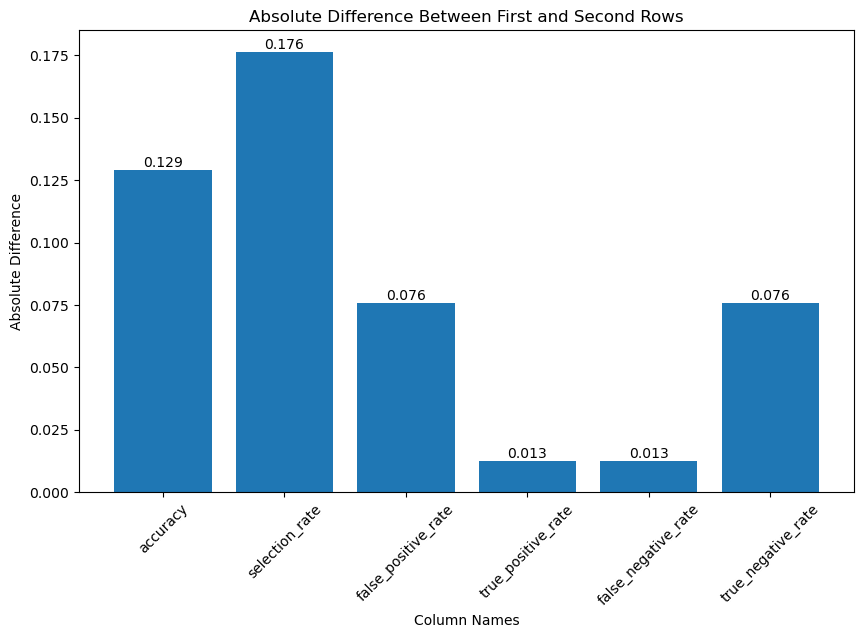

In [391]:
plot_diff(diff_new)

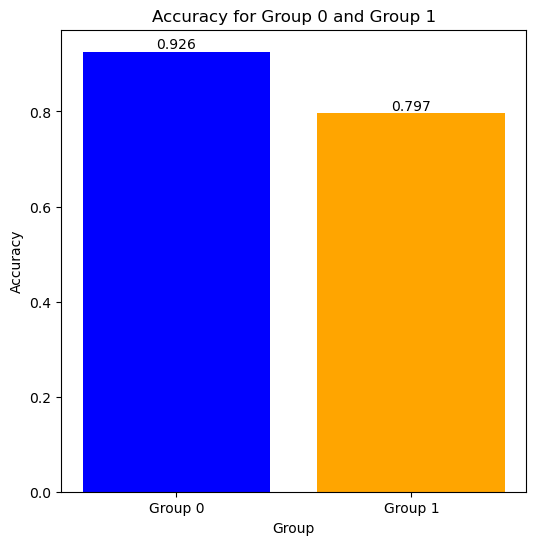

In [392]:
plot_diff_accuracy(diff_new)

### 9. METRIC: DISCRIMINATIVE RISK

In [393]:
from src.attribution.oracle_metric import perturb_numpy_ver, ell_fair_x
def fairness_value_function(sen_att, priv_val, unpriv_dict, X, model):
    X_disturbed = perturb_numpy_ver(
        X=X,
        sen_att=sen_att,
        priv_val=priv_val,
        unpriv_dict=unpriv_dict,
        ratio=1.0,
    )

    fx = model.predict_proba(X)[:, 1]
    fx_q = model.predict_proba(X_disturbed)[:, 1]

    # TODO: There might be problems when the classification problem is not binary
    # return np.abs(fx - fx_q)
    return np.mean(np.abs(fx - fx_q))

In [ ]:
## initial data
before = fairness_value_function(sen_att, priv_val, unpriv_dict, X_test.values, model)
print(f'DR_before: {before}')
after = fairness_value_function(sen_att, priv_val, unpriv_dict, X_test.values, model_new)
print(f'DR_after: {after}')

### 888. Unified Function

In [ ]:
# 模型的输出是新生成的data
def make_new_data(X_train, X_unlabel, num_groups, proportion, matcher='NN'):
    #与random_pick_groups函数结合起来
    random_picks = random_pick_groups(X_unlabel, proportion=proportion, group_num=num_groups)
    new_data = []
    for random_pick in random_picks:
        # random_pick1, random_pick2
        if matcher == 'NN':
            matching = NearestNeighborDataMatcher(
                X_labeled=X_train,
                X_unlabeled=random_pick,
            ).match(n_neighbors=1)
        else:
            matching = OptimalTransportPolicy(
                X_labeled=X_train.values,
                X_unlabeled=random_pick.values,
            ).match()
        fairness_shap_values = fairness_explainer.shap_values(
                                                        X=X_train.values,
                                                        X_baseline=random_pick.values,
                                                        matching=matching,
                                                        sample_size=500,
                                                        shap_sample_size="auto",)
        # 对shapley value不取绝对值
        varphi = fairness_shap_values
        # 把varphi中的负值直接设为0, 然后归一化
        varphi = fix_negative_probabilities(varphi)

        # for the first random pick group
        q = DataComposer(
            x_counterfactual=random_pick.values, 
            joint_prob=matching, 
            method="max").calculate_q() # Use joint_prob to find the matching unlabeled data to each labeled data instance
